# Section 10: Non-negative Matrix Factorization

Section notes by Wendy Valencia-Montoya (TF 2020),  adapted from Angel Tang (TF 2019), Jung-Eun Shin (TF 2018) and William Mallard (TF 2017).

## Non-negative Matrix Factorization

__[Non-negative matrix factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) (NMF)__ is a [matrix decomposition](https://en.wikipedia.org/wiki/Matrix_decomposition) method, where we constraint the matrices to be non-negative. This technique basically splits a matrix __V__ into two smaller __W__ and __H__ [non-negative matrices](https://en.wikipedia.org/wiki/Nonnegative_matrix) whose [product](https://en.wikipedia.org/wiki/Matrix_multiplication) is approximately equal to the original matrix.

In a deep sense, we are actually __[compressing](https://en.wikipedia.org/wiki/Data_compression)__ our data through a rank factorization. We want to reduce the original dimensions of our matrix of observations __V__ of size *N×M* by decomposing it into two matrices __W__ and __H__ of size *N×R* and *R×M*. Since __W__ × __H__ only approximates __V__, this is actually __[lossy compression](https://en.wikipedia.org/wiki/Lossy_compression)__.

Each column in __W__ is a basis element, which means some component that crops up again and again in all of the original *M* data points. These components are the fundamental building blocks we can use to reconstruct an approximation to all the observed data points. On the other hand, each column in __H__ gives you the coordinates of a data point, in the basis of __H__, i.e., it tells us how to reconstruct an approximation to the original data point from a linear combination of the building blocks in __W__. 

In other words, we can interpret __V__ to be a weighted sum of some components, where each column in __W__ is a component, and each column in __H__ contains the weights of each component. Therefore, we can think of NMF as descompossing each data point into an overlay of certain components.

_Why do we want to do this?_ The idea is that there is some [rule-driven process generating our data](https://en.wikipedia.org/wiki/Generative_model); we have taken a number of noisy measurements of the system's output, and we would like to discover the underlying structure of our data -- and ultimately infer the specific rules of the generative model.  

NMF has become so popular to infer underlying hidden variables mainly because of its ability to automatically extract sparse and easily interpretable factors. Indeed, NMF has been applied to diverse fields such as: astronomy,computer vision, document clustering, missing data imputation, chemometrics, audio signal processing, recommender systems, population genetics, and RNA expression data. For this section, we are about to go through an example of an application of NMF in population genetics to estimate admixture coefficients of different populations or species that may have interbred in the past, or that are subject to ongoing hybridization.

## Are cloud forest Andean beetles a single population?

Climatic fluctuations in the mountains can result in up or downslope shifts of entire ecosystems. A clever way of inferring the history of these shifts is by studying genetic patterns of current species that are tightly associated with a particular kind of ecosystem such a rainforest, cloud forest, or alpine tundra along an altitudinal gradient. Field biologists from a beetle genetic lab set up to investigate ecosystem shifts of the cloud forest of Andean mountains. One hypothesis is that a species of cloud forest beetle forms a single population, consistent with long-term altitudinal stability of this ecosystem. The competing model is that the beetle species consists of several populations despite there are none obvious geographic barriers. The latter hypothesis is based on their belief that the different populations formed in isolation in the mountaintops of different peaks. If the cloud forest just recently shifted downslope, it may not have been enough time to erode the genetic differentiation between populations, although hybridization may be expected.

The beetle lab has genotyped 300 loci for 120 individuals and summarized the genetic variation by counting the number of sites with derived alleles per locus. Their data is a simple whitespace-delimited table, available here. 

Basically, the goal is to find the number of populations (the hidden parameter) that resulted in the observed data (genotypes). Additionally, you want to find potential hybrid individuals in case there is more than one population as a signature of ongoing genetic exchange. You have taken MCB112 and distinctly remember you can approach this problem through non-negative matrix factorization since you aim to find hidden components (populations) that group your individuals, but also admixture coefficients to identify hybrid individuals (weights of the different components). 

In summary, you have a matrix __V__ of observed genetic data (*NXM*), with *N* loci, across *M* individuals, and you want to decompose these derived allele counts in two matrices __W__ (*NxR*) and __H__ (*RxM*).

If we succeed, then:

 - R is the number of populations
 - __W__ tells us the frequencies of derived alleles on the different populations.
 - __H__ tells us how much each of those populations contributes to the genetic makeup of an individual (admixture coefficients.

In [18]:
#Packages we need to import
import numpy as np
import pandas as pd
from sklearn.decomposition import non_negative_factorization
import matplotlib.pyplot as plt

We can read the data:

In [19]:
N=300 #Number of loci genotyped
M=120 #Number of individuals
filename='w10-section-data.txt' #Data set
V_obs=np.ones((N,M)) #Empty matrix to read the data
loci_names=[]
with open(filename, 'rt') as fd:
    for n,line in enumerate(fd):
        fields = line.split()
        loci_names.append(fields[0])
        V_obs[n] = [int(i) for i in fields[1:]]

**NB:** For the pset you have to implement the actual algorithms for NMF, but in the mean time, for the section and for getting familiar with the problems you can solve with NMF, we can use the awesome module scikit learn. 

We have to pass to the `non_negative_factorization` function the matrix of observed data __V_obs__, but we also have to decide the number of components, that is the *rank* for the factorization. In general, it is hard to know how to choose the factorization rank r. Some approaches include trial and error, estimation using the dacay in likelihood, and insights from experts. Here and in the pset, we can run the optimization with several n_components, and observed the change in log-likelihood. Therefore, it is handy to have a separate function to calculate tthe log likelihood (Here in pseudo-code).

For implementing this function, we ignore the factorial term since it's independent of $W$ and $H$.  In matrix operation notation, the log likelihood is:

\begin{equation*}
\log{P(V\vert W, H)} \sim \sum_{\mu, i} V\log{(\lambda)}-\lambda,
\end{equation*}

where the multiplication, log, and subtraction are elementwise operations, and the sum is over all elements in the matrix.

In [20]:
def log_likelihood(V, C, W, H):
    """input
            V: observed counts matrix (NxM)
            C: total number of counts per experiment (Rx1)
            W: current weights matrix (NxR)
            H: current mixture coefficients matrix (RxM)
        output
            ll: total log likelihood of data given model
    """
    #Calculate expected counts V_exp from C, W, and H
    
    #V_exp=
    
    #Calculate loglikelihood using observed counts and expected counts
    
    #ll =
    
    return ll

After you have a function to calculate the likelihood, you can run the NMF function with several numbers of components and evaluate the likelihood. Here, only the best number of populations (R=3) is included, and you can arrive at the same conclusion after implementing the algorithms for NMF and the likelihood function :)

Besides, note that we are using the multiplicative update to resemble closer (solver = "mu")  Lee and Seung (1999) formulation. Also, we use "Kullback-Leibler" given that we have discrete counts, which is better suited than the Frobenius norm that assumes Gaussian noise. Check the function __[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.non_negative_factorization.html)__ for more information. 

In [21]:
W, H, n_iter = non_negative_factorization(V_obs, beta_loss= 'kullback-leibler', n_components=3,init='random', solver = "mu",tol=0.000001, max_iter=300)

/Users/wendyvalencia/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1069: ConvergenceWarning: Maximum number of iteration 300 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


We may try a handful of numbers of components, and you can decide on what is a good number of components by evaluating the likelihood, using different values for R.

A common plot of the admixture proportions portrays individuals in the X-axis and the percentage of the genomes coming from different populations. A widely used practice is to sort the array by population. 

In [22]:
def sort_array_pop(V_array, n_comp):
    for i in range(n_comp):
        if i == 0:
            pop1= V_array[:,np.argmax(V_array, axis =0) == i]
            pop1_sort = pop1[:,pop1[i].argsort()[::-1]]
        elif i == 1:
            popn = V_array[:,np.argmax(V_array, axis =0) == i]
            popn_sort = popn[:,popn[i].argsort()]
            sorted_array = np.concatenate((pop1_sort,popn_sort), axis =1)
        else:
            popn = V_array[:,np.argmax(V_array, axis =0) == i]
            popn_sort = popn[:,popn[i].argsort()]
            sorted_array = np.concatenate((sorted_array,popn_sort), axis =1)
    
    return sorted_array    

We should renormalize H, since unlike Sean in class, who implemented a smart trick to write H as probabilities and keep the counts separated, the NMF from sklearn function is directly optimizing the counts. 

In [23]:
H_nor = H / H.sum(axis=0)
H_sorted = sort_array_pop(H_nor,3)

Finally, a function to visualize the genetic composition of each individual (i.e., the proportion of the genome of a single sampled beetle that comes from the three different inferred populations).

In [24]:
def plot_amixturelike(array_H):
    sort_array_fin = array_H
    r = [i for i in range(len(sort_array_fin[0]))]
    raw_data = {'bluebars': list(100*(sort_array_fin[0,:])), 'redbars': list(100*(sort_array_fin[1,:])),'yellowbars': list(100*(sort_array_fin[2,:]))}
    df = pd.DataFrame(raw_data)
     
    # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df['bluebars'], df['redbars'], df['yellowbars'])]
    bluebars = [i / j * 100 for i,j in zip(df['bluebars'], totals)]
    redbars = [i / j * 100 for i,j in zip(df['redbars'], totals)]
    yellowbars = [i / j * 100 for i,j in zip(df['yellowbars'], totals)]
     
    # plot
    barWidth = 1
    #names = ('A','B','C','D','E')
    f, ax = plt.subplots(figsize=(20,5))
    # Create green Bars
    plt.bar(r, bluebars, color='lightskyblue', edgecolor='white', width=barWidth)
    # Create orange Bars
    plt.bar(r, redbars, bottom=bluebars, color='lightcoral', edgecolor='white', width=barWidth)
    # Create blue Bars
    plt.bar(r, yellowbars, bottom=[i+j for i,j in zip(bluebars, redbars)], color='khaki', edgecolor='white', width=barWidth)
     
    # Custom x axis
    #plt.xticks(r, names)
    plt.xlabel("Individual")
     
    # Show graphic
    plt.show()

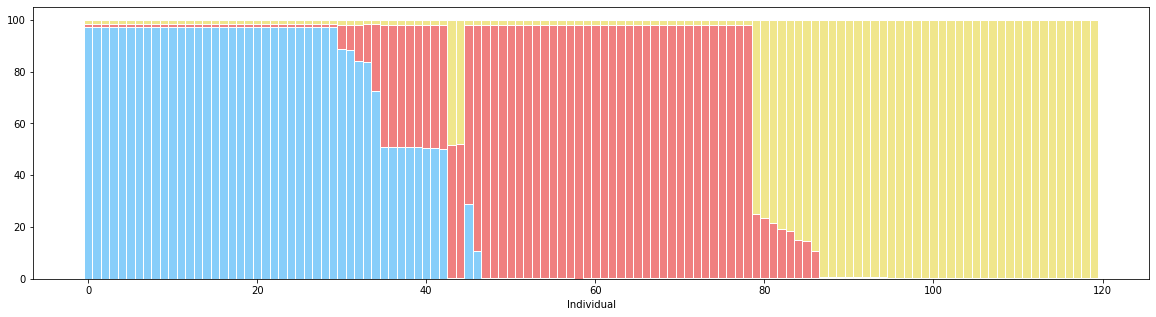

In [25]:
plot_amixturelike(H_sorted)

With the plot, we can more easily appreciate that there are at least three different populations and several admixed individuals, lending support to the hypothesis of ancestral isolation between different populations of the cloud forest mountain beetle.

## Python tips

### Random functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Randomly generate a __W__ matrix with _N_ rows and _R_ columns, such that each column sum up to one. The __H__ matrix can be generated similarly. May be useful when simulating your data and initialization for NMF.

In [3]:
N, M, R = 100, 50, 5 # N genes, M experiments, R modules
W = np.random.dirichlet(np.ones(N), size=R).T # you can also use np.apply_along_axis as will be explained later
print(W.shape)
print(sum(W))

(100, 5)
[1. 1. 1. 1. 1.]


`np.random.dirichlet` generates a list of _n_ random numbers that sum to 1. Alpha is the typical Dirichlet parameter vector; lower values of alpha generate a sparser vector. This might come in handy when generating your __W__ matrix for your homework because a single gene modeule is likely to have a sparse relative expression vector. An illustration is shown below.

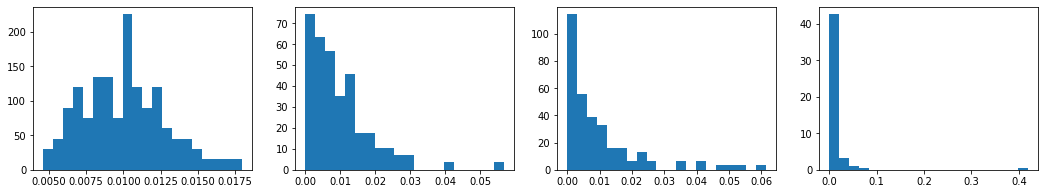

In [4]:
alphas = [10, 1, 0.5, 0.1]
n = 100
figs,axs = plt.subplots(1, 4, figsize=(18,3))
for i, alpha in enumerate(alphas):
    axs[i].hist(np.random.dirichlet(alpha*np.ones(n)), bins=20, density=True)

plt.show()

To add Poisson noise to a matrix:

In [5]:
N, M = 10, 5
L = 1e6 * np.random.random((N, M))

print("The original matrix is:\n", np.round(L, 3))

The original matrix is:
 [[828756.149 303564.694 180421.331 644968.406 591079.601]
 [771165.821 643607.776 331841.708  32676.559 814606.385]
 [378855.821 457563.917 153864.787 197833.729 777938.529]
 [403728.92  406048.646 429457.828 749506.651 388460.742]
 [662947.66   34275.355 570499.521 983140.53  738613.637]
 [380135.528 180238.314 814467.131 510705.973 409860.95 ]
 [953381.103 995632.591 939113.514 156562.724  25966.157]
 [119870.184 163262.768 765322.656 363544.147 831993.004]
 [151570.158  70383.063 699119.368 618149.925 512896.284]
 [ 18820.009 665923.425 265534.974 219362.422 215328.595]]


In [6]:
print("The matrix after adding Poisson noise:\n", np.random.poisson(L))

The matrix after adding Poisson noise:
 [[829523 303630 180449 644121 590969]
 [770395 642546 330777  32474 814773]
 [379032 456548 153790 197722 776908]
 [403004 406241 429905 749256 389108]
 [661787  34442 570162 983121 740170]
 [381387 180107 813882 511232 410261]
 [954852 994043 939394 156152  26046]
 [119682 162260 766397 362810 831072]
 [150938  70413 698495 618950 511228]
 [ 18613 666378 265888 219690 215044]]


### Matrix multiplication

Python has a dedicated single-character [infix](https://en.wikipedia.org/wiki/Infix_notation) math operator specifically for the purpose of matrix multiplication: __the `@` symbol__. This [was added](https://www.python.org/dev/peps/pep-0465/) to Python3 to eliminate ambiguity about what `*` means in the context of two matrices.

The `@` operator performs [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) on two matrices of compatible dimensions. eg, if `A` is an N×R matrix and `B` is an R×M matrix, then `A @ B` will give an N×M matrix.

The `*` operator performs [element-wise multiplication](https://en.wikipedia.org/wiki/Hadamard_product_%28matrices%29) on two matrices of the same dimensions. eg, if `A` is an N×M matrix and `B` is an N×M matrix, then `A * B` will give an N×M matrix.

### Matrix functions

To create an N×M matrix of zeros, use `np.zeros()`. There is also `np.ones()`, and we are already familiar with `np.random.random()`.

In [7]:
N, M = 10, 5

np.zeros((N, M))
np.ones((N, M))
np.random.random((N, M))

array([[0.16477493, 0.73933374, 0.56988856, 0.61678734, 0.23798651],
       [0.66301537, 0.49340195, 0.9869649 , 0.42576324, 0.47851367],
       [0.55403078, 0.25593087, 0.35251436, 0.3589017 , 0.72616016],
       [0.71154164, 0.75759915, 0.77727934, 0.93432638, 0.57690342],
       [0.80692695, 0.28318693, 0.74542881, 0.69882094, 0.05988588],
       [0.94325423, 0.34524789, 0.91998229, 0.99569443, 0.64020768],
       [0.01690838, 0.57429171, 0.57097306, 0.53236099, 0.93365809],
       [0.36715088, 0.0425232 , 0.15438888, 0.86086126, 0.23822314],
       [0.47338393, 0.5034946 , 0.98155374, 0.20006426, 0.64186293],
       [0.67241462, 0.81312395, 0.37143047, 0.22092327, 0.48704332]])

Let's say you have a function that only operates on 1D arrays -- eg, `np.random.dirichlet()`. And let's say you're trying to apply this function to each column of a matrix of ones. You can achieve this with `np.apply_along_axis()`. It takes three arguments: the function to apply, the axis to apply it along, and the matrix to apply it to. As usual, axis=0 is columns, axis=1 is rows.

In [8]:
N, R = 10, 5
W = np.ones((N, R))

np.apply_along_axis(np.random.dirichlet, 0, W)

array([[0.02634111, 0.03606111, 0.08038986, 0.06644483, 0.09719608],
       [0.05512077, 0.0219442 , 0.01838183, 0.14130039, 0.05208666],
       [0.06268665, 0.33896843, 0.39802107, 0.2625763 , 0.02995739],
       [0.16458795, 0.16133434, 0.16765693, 0.07146581, 0.23032693],
       [0.14233054, 0.06301238, 0.0388472 , 0.03210519, 0.03483534],
       [0.08502519, 0.05153743, 0.00934048, 0.02338332, 0.00852954],
       [0.31382729, 0.00690901, 0.03169892, 0.05123088, 0.04364808],
       [0.03169968, 0.00762102, 0.07350008, 0.19650209, 0.11083772],
       [0.03826777, 0.19299961, 0.11342401, 0.0246196 , 0.02327936],
       [0.08011304, 0.11961248, 0.06873963, 0.13037159, 0.36930291]])

You can sum all of a matrix's values with the `.sum()` method. If you want to sum the values in all columns or rows, you can use the `.sum()` method's `axis` argument.

In [9]:
N, M = 5, 3
X = np.ones((N, M))

X.sum()        # --> 30.0
X.sum(axis=0)  # --> array([ 5.,  5.,  5.])
X.sum(axis=1)  # --> array([ 3.,  3.,  3.,  3.,  3.])

array([3., 3., 3., 3., 3.])

To normalize the columns of a matrix, we can just divide the matrix by the sum of the columns.

In [ ]:
N, M = 5, 3
X = np.random.random((N, M))

X /= X.sum(axis=0)

It's actually a little surprising that this works, given that we're asking to divide a 5×3 matrix by a 3-element vector. NumPy somehow figures out that you actually want it to perform element-wise division between the 1×3 matrix and each row of the 5×3 matrix. But for reasons that are unclear to me, it cannot figure out what you want it to do for a 5×3 matrix and a 5-element vector ... at least not without a little help. To help NumPy figure out what you want, we need to use NumPy broadcasting.

Other useful functions to be familiar with:

In [ ]:
np.multiply()
np.divide()
np.power()

**Check your dimensions as you go!**

### NumPy broadcasting for element-wise operations

If you have a matrix __A__ with dimensions N×M, and you want to add an M-element array __b__ to all of __A__'s rows, you just need to add another axis to __b__, keeping the two same-sized axes aligned. In this example, `A.shape` is (N, M) and `b.shape` is (M,).

To add an axis to __b__, NumPy uses the notation: `B = b[np.newaxis,:]` Since we put the new axis first, `B.shape` will be (1, M). If we had instead done `b[:,np.newaxis]`, then `B.shape` would be (M, 1). But we are trying to make __B__ compatible with __A__, so we made __B__'s second dimension agree with __A__'s second dimension (ie, both are of size M).

`np.newaxis` is synonymous with `None`, so you could also do `b[None,:]`.

Now that __A__ and __B__ are both 2D matrices, you can just say: `A + B`, and Numpy will replicate the first (and only) row of __B__ N times before performing standard element-wise addition on two N×M matrices. This is best described visually

In Python:

In [10]:
A = np.array([0, 10, 20, 30])
B = np.array([0, 1, 2])

print('A:', A, 'shape:', A.shape)
print('B:', B, 'shape:', B.shape)

A: [ 0 10 20 30] shape: (4,)
B: [0 1 2] shape: (3,)


In [11]:
# we want to make A.shape to (4, 1)
new_A = A[:, np.newaxis]
print("new A:\n", new_A, 'shape:', new_A.shape)

new A:
 [[ 0]
 [10]
 [20]
 [30]] shape: (4, 1)


In [12]:
# now we can add A and B
print("A+B:\n", new_A+B)

A+B:
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


__Note:__ Broadcasting is not strictly necessary for this homework. Anything you can do with NumPy broadcasting, you can also do by brute force with a `for` loop; it will just run much slower (~10-100x for this homework).

## Homework hints

### Problem 1

We want to generate known __W__ and __H__ matrices, and use them to generate a noisy __V__ matrix.

For __W__, each row represents a gene, and each column represents a module. Each row should have a non-zero entry in only one column -- unless it is a moonlighting gene in which case it should have a non-zero value in two columns. Each column should sum to one.

For __H__, each row represents a module, and each column represents a sample. This can be random, but each column should sum to one. You could generate a ones matrix, and apply `np.random.dirichlet()` along each column.

For __V__, find the matrix product of __W__ and __H__, and then add Poisson noise.

We'll feed __V__ into our NMF function, and try to recover the true __W__ and __H__.

### Problem 2

The NMF function should take two arguments: __V__ (the matrix to decompose) and R (the number of modules we think __V__ contains).

To decompose __V__, start with randomly generated __W__ and __H__ matrices, and run the NMF update steps until the log likelihood converges.

The NMF update equations contain three different subscripts, so the easiest solution is to use three nested for loops for the first __W__ update step, and another three for the __H__ update step.

_If that's too easy for you and you're up for a challenge, it is also possible to implement both update steps with nothing but matrix algebra. This runs much faster than the for loop implementation, but it also requires some mathematical intuition and a solid understanding of NumPy broadcasting._

__Hint:__ _Both update steps are simply projecting two 2D matrices into 3D via broadcasting, performing element-wise multiplication, and collapsing them back to 2D via summation along the axis shared by the original two matrices._

After each update step, we want to calculate the log likelihood that __V__ was generated by our current guess at __W__ and __H__. See Sean's lecture notes for the log likelihood formula.

__Note:__ You should not need a for loop to calculate log likelihood. All three matrices in the log likelihood equation are of the same size, so you can use normal arithmetic operators and the log function on your NumPy matrices, and then use the `.sum()` method for the double summation.

__Note:__ From step to step, we only care about the gradient of the log likelihood -- ie, how much it has changed -- which means that any constant terms will cancel out. Specifically, there is a log(V!) term that we can ignore, which is nice because __V__! is huge and dealing with it would be a pain.

Recover __W__ and __H__ for R=3..6, and compare the resulting log likelihoods. Did you recover the correct R? Can you recover the gene-to-module assignments from __W__? Do you also recover the moonlighting genes?

__Hint:__ You'll probably need to row-normalize __W__, and then look at a histogram. Don't forget to `flatten()` your NumPy array before you histogram.

### Problem 3

If you've made it this far, Problem 3 should be easy. Take the provided data set, and repeat the same steps as Problem 2. Find R, find __W__, identify any moonlighting genes.